# ML Case Study 4

## Predicting Student Performance

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [25]:
df = pd.read_csv('student-mat.csv', sep=';')

In [28]:
print(df.head())
print("Shape:", df.shape)


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Shape: (395, 33)


## EDA

First 5 rows:
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 pass_fail  
0        3     4     1     1       3        6   5   6   6         0  
1        3     3     1     1       3        4   5   5   6         0  
2        3     2     2     3       3       10   7   8  10         1  
3        2     2     1     1       5        2  15  14  15         1  
4        3     2     1     2       5        4   6  10  10         1  

[5 rows x 34 columns]
Missing values:
 school        0
sex           0
age   

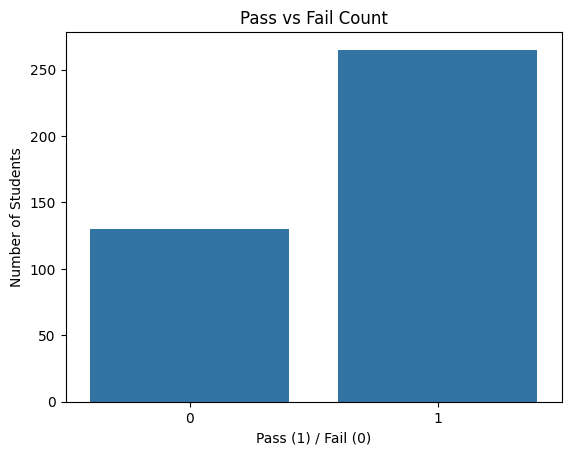

In [30]:
df['pass_fail'] = (df['G3'] >= 10).astype(int) 

print("First 5 rows:\n", df.head())
print("Missing values:\n", df.isnull().sum())
print(" distribution:\n", df['pass_fail'].value_counts())

sns.countplot(x='pass_fail', data=df)
plt.title("Pass vs Fail Count")
plt.xlabel("Pass (1) / Fail (0)")
plt.ylabel("Number of Students")
plt.show()


## Encoding

In [31]:
cat_cols = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
            'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

## Train-Test Split

In [32]:
X = df.drop(['G1','G2','G3','pass_fail'], axis=1)
y = df['pass_fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [33]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

## Model Evaluation

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(" Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7088607594936709
 Matrix:
 [[13 14]
 [ 9 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.48      0.53        27
           1       0.75      0.83      0.79        52

    accuracy                           0.71        79
   macro avg       0.67      0.65      0.66        79
weighted avg       0.70      0.71      0.70        79



## Feature Importance

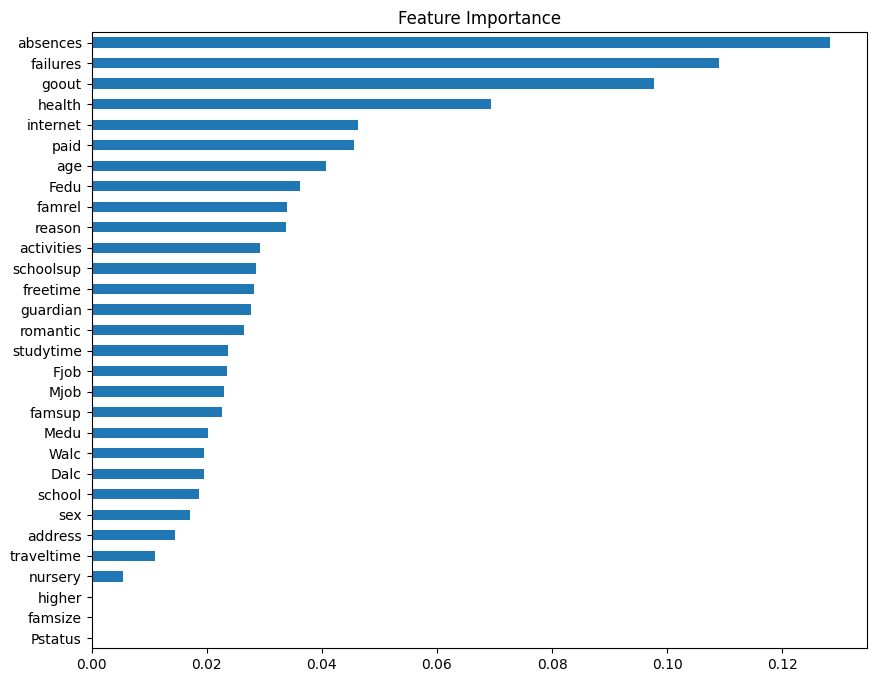

In [37]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,8))
plt.title("Feature Importance")
plt.show()